# MPG Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import certifi
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Tasks

### 1. The data file for this project is available from the Seaborn website. To load this data into a DataFrame, run this code:

In [5]:
mpg = sns.load_dataset('mpg')

### 2. Display the first five rows of data.

In [6]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### 3. Get the correlation data for the mpg column. Sort the results to make it easier to see the columns with the stronger correlations.

In [17]:
# removes non numbered columns 
numeric_columns = mpg.select_dtypes(include=['int64', 'float64']).columns

correlation_matrix = mpg[numeric_columns].corr()

mpg_correlation = correlation_matrix['mpg'].sort_values(ascending=False)

mpg_correlation

mpg             1.000000
model_year      0.579267
acceleration    0.420289
cylinders      -0.775396
horsepower     -0.778427
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64

### 4. Use the column with the strongest positive or negative correlation to the mpg column to split the data into test and training datasets, where the test dataset consists of 20% of the total dataset. Be sure to specify a value for the random_state parameter.

In [20]:
strongest_corr_column = 'weight'

X = mpg[[strongest_corr_column]]  
y = mpg['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Prints out the results to verify the split
print(f"Training feature set shape: {X_train.shape}")
print(f"Test feature set shape: {X_test.shape}")
print(f"Training target set shape: {y_train.shape}")
print(f"Test target set shape: {y_test.shape}")

Training feature set shape: (318, 1)
Test feature set shape: (80, 1)
Training target set shape: (318,)
Test target set shape: (80,)


### 5. Create a linear regression model from the training dataset.

In [48]:
model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

### 6. Score the model using the test dataset.

In [49]:
score = model.score(X_test, y_test)
print(f"The R^2 score of the model on the test dataset is: {score}")

The R^2 score of the model on the test dataset is: 0.722971057303075


### 7. Score the model using the training dataset.

In [50]:

r2_score_train = model.score(X_train, y_train)
print(f"The R^2 score of the model on the training dataset is: {r2_score_train}")


The R^2 score of the model on the training dataset is: 0.6844798112332582


### 8. Predict the y values based on the x values in the test dataset, and store the results in a variable. Then, put the predicted values in a DataFrame.

In [51]:
X = mpg[['weight']] 
y = mpg['mpg'] 

# Splitting the data into train and test datasets with 20% of the data as the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Creating a linear regression model and training it
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

predicted_values_df = pd.DataFrame({'Predicted_mpg': y_pred})

print(predicted_values_df.head())

   Predicted_mpg
0      32.771653
1      26.293302
2      26.223055
3      16.029409
4      13.711252


### 9. Join the y_test and predicted data with the x_test data, save the combined data in a new DataFrame, and then display the first five rows of data.

In [52]:
combined_df = X_test.copy()
combined_df['Actual_mpg'] = y_test
combined_df['Predicted_mpg'] = y_pred

combined_df.reset_index(drop=True, inplace=True)

combined_df.head()

,weight,Actual_mpg,Predicted_mpg
0,1795,33.0,32.771653
1,2625,28.0,26.293302
2,2634,19.0,26.223055
3,3940,13.0,16.029409
4,4237,14.0,13.711252


### 10. Add the residuals to the new DataFrame.

In [53]:
# Calculating residuals (the difference between the actual and predicted values)
combined_df['Residuals'] = combined_df['Actual_mpg'] - combined_df['Predicted_mpg']

print(combined_df.head())

   weight  Actual_mpg  Predicted_mpg  Residuals
0    1795        33.0      32.771653   0.228347
1    2625        28.0      26.293302   1.706698
2    2634        19.0      26.223055  -7.223055
3    3940        13.0      16.029409  -3.029409
4    4237        14.0      13.711252   0.288748


### 11. Plot the residuals in a Seaborn KDE plot.


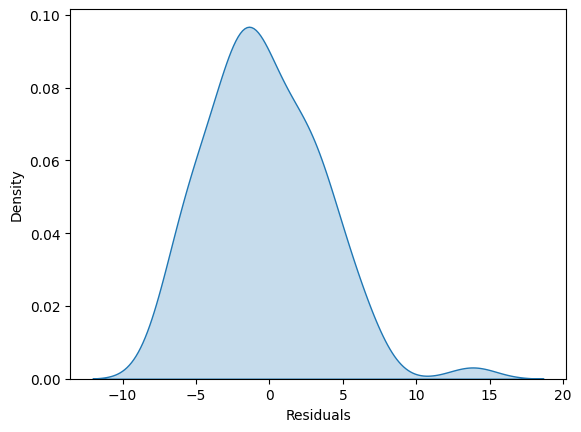

In [54]:
sns.kdeplot(data=combined_df['Residuals'], fill=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

### 12. Melt the actual and predicted MPG columns together, assigning appropriate values to the variable and value names.

In [55]:
# Melting the actual and predicted MPG columns together
melted_df = combined_df.melt(id_vars=["weight"], 
                             value_vars=["Actual_mpg", "Predicted_mpg"], 
                             var_name="Type", 
                             value_name="MPG")
melted_df


,weight,Type,MPG
0,1795,Actual_mpg,33.000000
1,2625,Actual_mpg,28.000000
2,2634,Actual_mpg,19.000000
3,3940,Actual_mpg,13.000000
4,4237,Actual_mpg,14.000000
...,...,...,...
155,3365,Predicted_mpg,20.517423
156,3520,Predicted_mpg,19.307610
157,2605,Predicted_mpg,26.449407
158,1937,Predicted_mpg,31.663309


### 13. Use a Seaborn scatter plot to plot the predicted data.

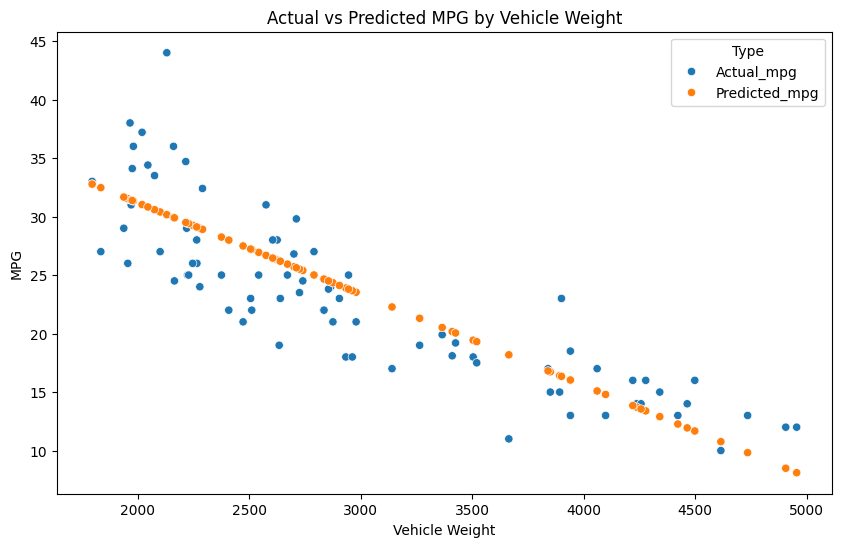

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=melted_df, x="weight", y="MPG", hue="Type")
plt.title('Actual vs Predicted MPG by Vehicle Weight')
plt.xlabel('Vehicle Weight')
plt.ylabel('MPG')
plt.show()